In [69]:
import tensorflow as tf
import numpy as np

In [70]:
### constants

In [110]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.boston_housing.load_data()

In [111]:
x_train.shape

(404, 13)

In [112]:
x_train[0]

array([  1.23247,   0.     ,   8.14   ,   0.     ,   0.538  ,   6.142  ,
        91.7    ,   3.9769 ,   4.     , 307.     ,  21.     , 396.9    ,
        18.72   ])

In [113]:
y_train.shape

(404,)

In [114]:
y_train[0]

15.2

In [115]:
mean = x_train.mean(axis=0)
std = x_train.std(axis=0)

x_train -= x_mean
x_train /= x_std

x_test -= x_test_mean
x_test /= x_std_test 

In [116]:
model = tf.keras.Sequential([
    tf.keras.layers.Normalization(),
    tf.keras.layers.Dense(64, activation="relu"),
    tf.keras.layers.Dense(32, activation="relu"),
    tf.keras.layers.Dense(32, activation="relu"),
    tf.keras.layers.Dense(32, activation="relu"),
    tf.keras.layers.Dense(1)
])
model.compile(optimizer="rmsprop",loss="mse", metrics=["mae"])

In [117]:
model.build(input_shape=x_train.shape)
model.summary()

Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization_12 (Normaliza  (404, 13)                27        
 tion)                                                           
                                                                 
 dense_56 (Dense)            (404, 64)                 896       
                                                                 
 dense_57 (Dense)            (404, 32)                 2080      
                                                                 
 dense_58 (Dense)            (404, 32)                 1056      
                                                                 
 dense_59 (Dense)            (404, 32)                 1056      
                                                                 
 dense_60 (Dense)            (404, 1)                  33        
                                                     

In [118]:
history = model.fit(x=x_train, y=y_train, epochs=40, batch_size=30, validation_data=(x_test, y_test))

Epoch 1/40
14/14 [==============================] - 1s 12ms/step - loss: 552.9474 - mae: 21.6597 - val_loss: 528.2567 - val_mae: 21.0939
Epoch 2/40
14/14 [==============================] - 0s 3ms/step - loss: 438.9386 - mae: 18.7865 - val_loss: 363.7378 - val_mae: 16.9282
Epoch 3/40
14/14 [==============================] - 0s 3ms/step - loss: 248.1694 - mae: 13.3010 - val_loss: 152.1580 - val_mae: 10.5150
Epoch 4/40
14/14 [==============================] - 0s 3ms/step - loss: 91.9829 - mae: 7.4617 - val_loss: 63.2119 - val_mae: 6.4838
Epoch 5/40
14/14 [==============================] - 0s 3ms/step - loss: 48.3504 - mae: 5.2717 - val_loss: 43.9545 - val_mae: 5.2559
Epoch 6/40
14/14 [==============================] - 0s 3ms/step - loss: 34.3223 - mae: 4.3127 - val_loss: 35.3211 - val_mae: 4.5615
Epoch 7/40
14/14 [==============================] - 0s 3ms/step - loss: 24.9626 - mae: 3.6113 - val_loss: 27.2113 - val_mae: 3.8487
Epoch 8/40
14/14 [==============================] - 0s 3ms/step

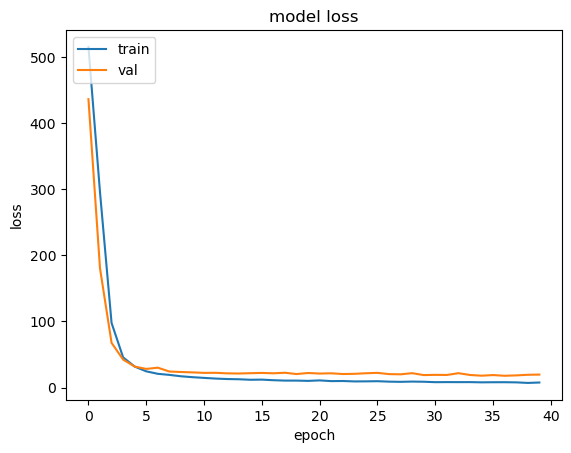

In [108]:

from matplotlib import pyplot as plt

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()